# The Iris Flower Classification

The Iris flower dataset is a classic dataset in the field of machine learning and statistical analysis. It consists of 150 observations of iris flowers, including the sepal and petal length and width for each flower, as well as the species of the flower. There are 3 iris types respectively- setosa, versicolour and virginica.

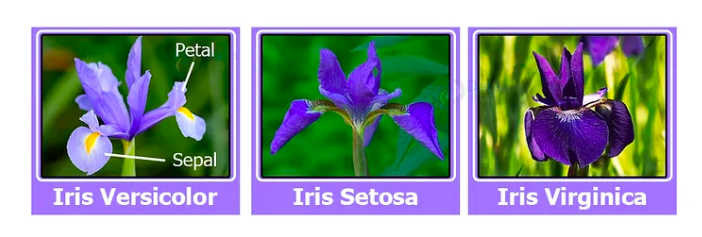

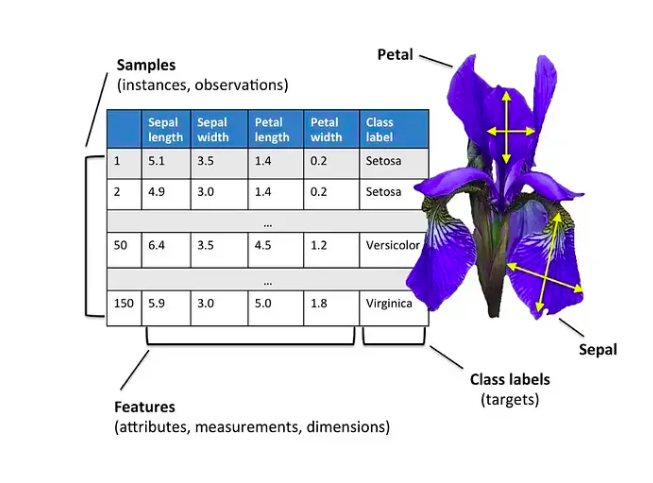

# Importing Libraries

In [2]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [3]:
sns.set()

Load Data

In [4]:
data=datasets.load_iris()

In [5]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
print(data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [7]:
data['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [8]:
data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# What problem are we trying to solve?
We are trying to use attributes of flowers to predict the species of the flower. Specifically, we are trying to use the sepal length and width & the petal length and width to prdict if an iris flower is if the type _Setosa_, _Versicolour_ or _Virginica_.

# Create a pandas Dataframe from the data
We could do our full analysis using NumPy and NumPy arrays, but we'll create a pandas dataframe because it make some things simpler, and also to get some practice using pandas.

In [11]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])

In [12]:
df['target']=data['target']

In [13]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


# Basic decriptive statistics

In [15]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Distributions of features and targets

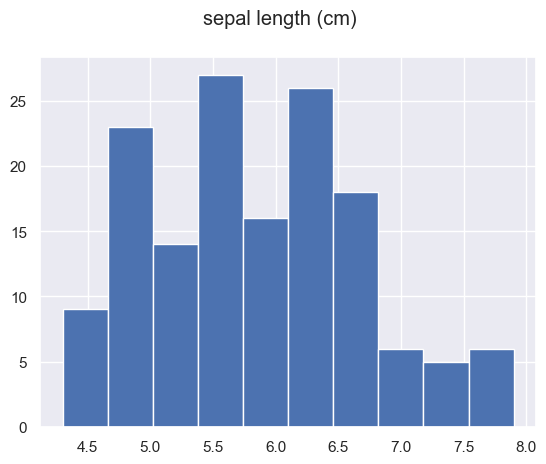

In [16]:
col="sepal length (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

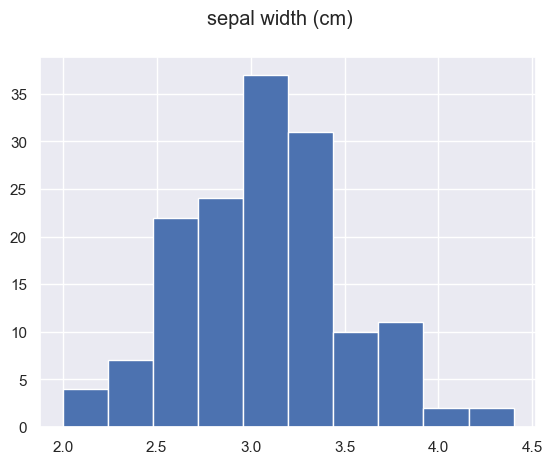

In [17]:
col="sepal width (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

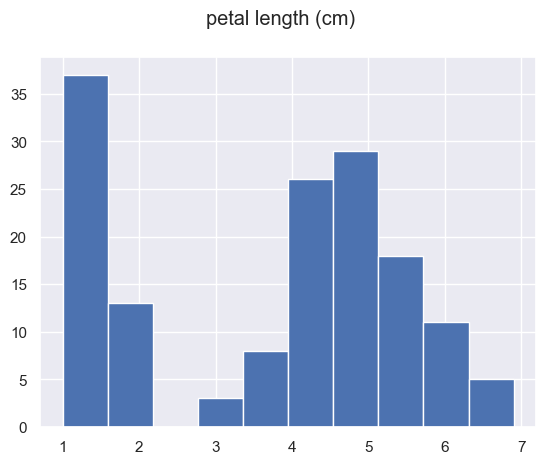

In [18]:
col="petal length (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

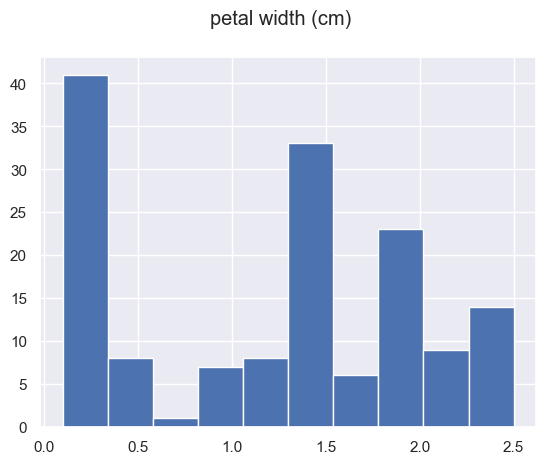

In [19]:
col="petal width (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

# Relationship of data features with the target

In [20]:
#Create new columns with the species name
df['target_name'] = df['target'].map({0: "setosa", 1: "versicolour", 2: "virginica"})

In [21]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


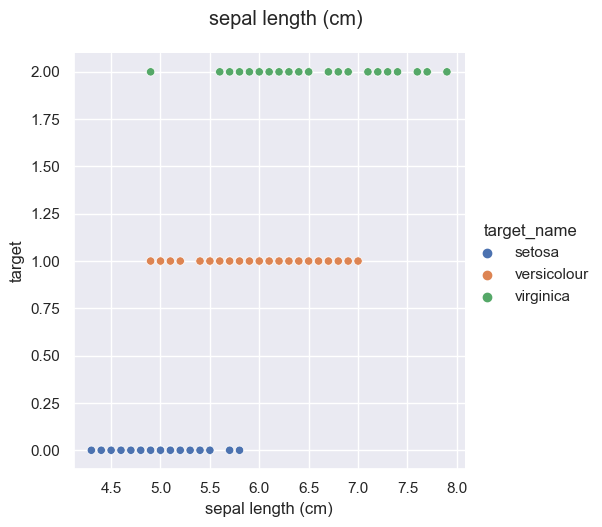

In [22]:
col = "sepal length (cm)"
sns.relplot(x=col, y="target", hue="target_name", data=df)
_=plt.suptitle(col,y=1.05)

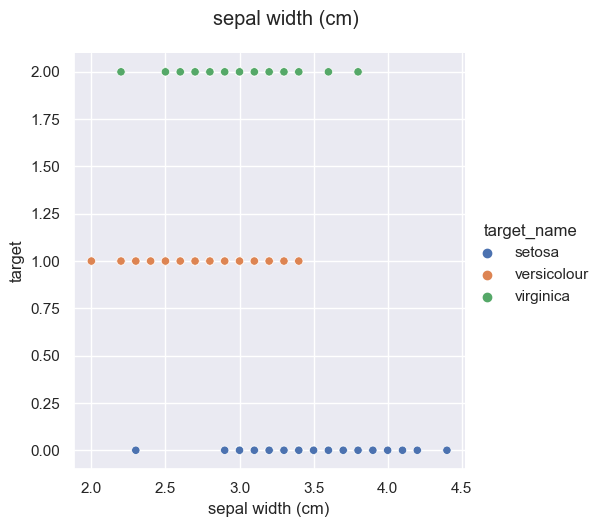

In [23]:
col = "sepal width (cm)"
sns.relplot(x=col, y="target", hue="target_name", data=df)
_=plt.suptitle(col,y=1.05)

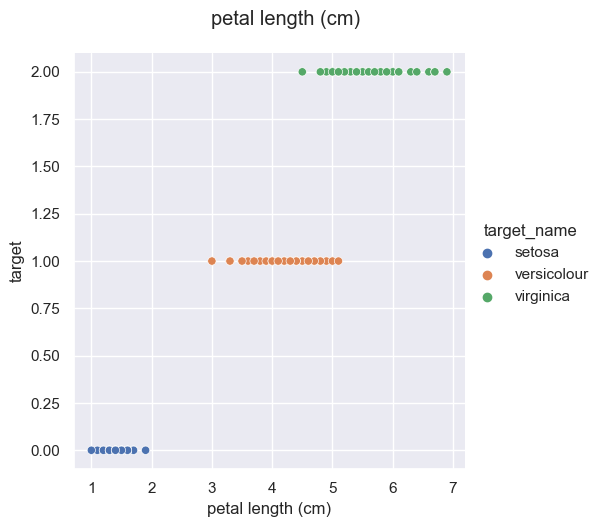

In [24]:
col = "petal length (cm)"
sns.relplot(x=col, y="target", hue="target_name", data=df)
_=plt.suptitle(col,y=1.05)

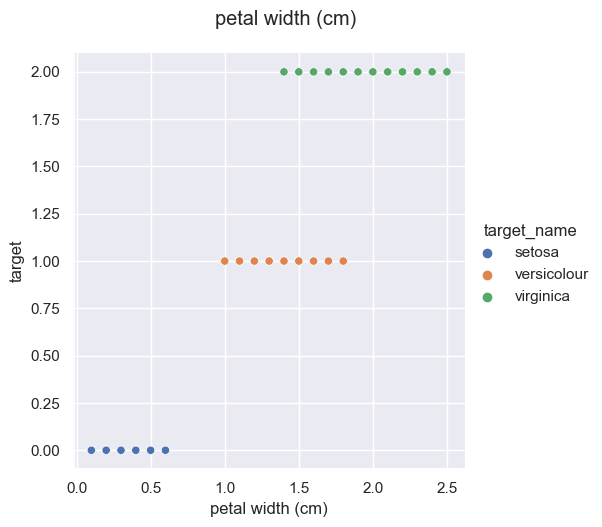

In [25]:
col = "petal width (cm)"
sns.relplot(x=col, y="target", hue="target_name", data=df)
_=plt.suptitle(col,y=1.05)

# EDA - Pairplots

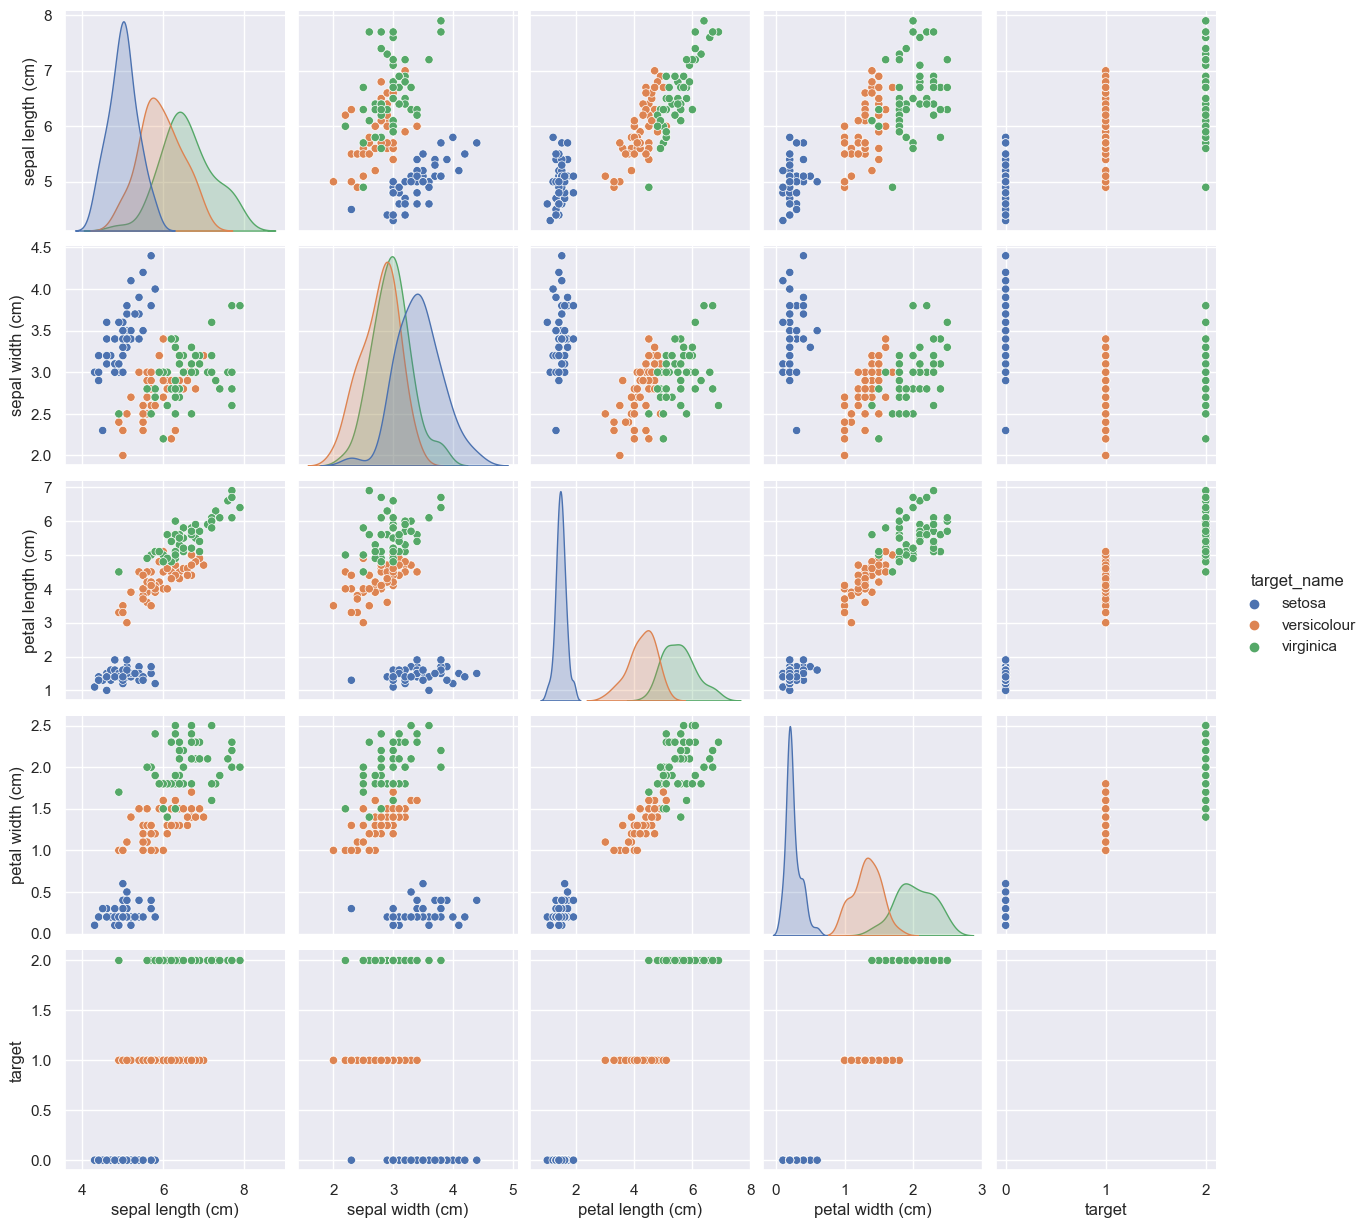

In [26]:
sns.pairplot(df , hue='target_name')

# Train test split
You always want to evaluate your final model on a test set that haven't been used at all in the training process. So we'll split off a test set here.

_(Note: This might be little less true if you use cross-validation, but is still considered a best practice)_

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
df_train, df_test = train_test_split(df, test_size=0.25)

In [29]:
df_train.shape

(112, 6)

In [30]:
df_test.shape

(38, 6)

In [31]:
df_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
107,7.3,2.9,6.3,1.8,2,virginica
137,6.4,3.1,5.5,1.8,2,virginica
7,5.0,3.4,1.5,0.2,0,setosa
76,6.8,2.8,4.8,1.4,1,versicolour
8,4.4,2.9,1.4,0.2,0,setosa


# Prepare data for modelling
This involves splitting the data into plain NumPy arrays.

In [32]:
x_train = df_train.drop(columns=['target' , 'target_name']).values
y_train = df_train['target'].values

In [33]:
x_train.shape

(112, 4)

In [34]:
y_train

array([2, 2, 0, 1, 0, 2, 2, 0, 1, 0, 1, 2, 1, 0, 2, 0, 0, 0, 1, 2, 2, 1,
       2, 1, 2, 2, 0, 1, 2, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 2, 2, 1, 2,
       1, 0, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 0, 2, 2, 1, 2, 1, 2, 2,
       2, 0, 1, 0, 1, 1, 0, 0, 0, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 0, 2,
       0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       2, 2])

# Modeling - What is our baseline?

What is the simplest model we can think of?

In this case, if our baseline model is just randomly guessing species of flower, or guessing a single species for every dtata point, we would expect to have a model accuracy of 0.33 or 33%, since we have 3 different classes that are evenly balanced.

So our model should atleast beat 33% accuracy.

# Modeling - Simple manual model

Let's manually look at our data and decide some cutoff points for classification.

In [35]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [36]:
def single_feature_prediction(petal_length):
    '''predicts the iris species given the petal length'''
    if petal_length < 2.5:
        return 0
    elif petal_length < 4.8:
        return 1
    else:
        return 2

In [37]:
x_train[:,2]

array([6.3, 5.5, 1.5, 4.8, 1.4, 5.9, 6.4, 1.4, 4.4, 1.2, 3.9, 5.6, 4.5,
       1.4, 5.2, 1.7, 1.5, 1.6, 5. , 6.1, 6. , 4.7, 5. , 4.7, 5.6, 5.8,
       1. , 4.2, 6.9, 1.5, 4. , 4.5, 3.7, 4.5, 1.4, 3.6, 1.6, 1.6, 4.1,
       1.3, 4.5, 6.1, 4.2, 5.3, 4.5, 1.5, 4. , 6. , 4.9, 4.4, 4. , 1.6,
       4.3, 5. , 5.8, 1.4, 3.9, 4.9, 1.5, 6.6, 5.1, 3.5, 4.8, 4. , 6.7,
       6.7, 5. , 1.4, 4. , 1.3, 5.1, 4.5, 1.2, 1.5, 1.6, 5.6, 5.1, 4.2,
       4.8, 5.6, 3.3, 3.8, 4.7, 5.1, 5.3, 4.9, 1.9, 5.1, 1.9, 1.6, 5.5,
       1.4, 5.6, 1.5, 1.7, 4.5, 1.5, 1.5, 5.8, 4.1, 1.4, 1.5, 1.1, 1.5,
       1.5, 1.3, 3.3, 4.6, 1.4, 4.7, 5.4, 5.7])

In [38]:
manual_y_predictions =np.array([single_feature_prediction(val) for val in x_train[:,2]])

In [39]:
manual_model_accuracy = np.mean(manual_y_predictions == y_train)

In [40]:
print(f"Manual model accuracy: {manual_model_accuracy * 100:.2f}%")

Manual model accuracy: 94.64%


# Modeling - Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

### Using a validation set ro evaluate our model

In [42]:
model = LogisticRegression(max_iter=200)

In [43]:
#Xt stands for "x_train", and Xv stands for "X_validation"
Xt, Xv, yt, yv = train_test_split(x_train, y_train, test_size=0.25)

In [44]:
model.fit(Xt, yt)

LogisticRegression(max_iter=200)

In [45]:
y_pred = model.predict(Xv)

In [46]:
np.mean(y_pred == yv)

0.9642857142857143

In [47]:
model.score(Xv,yv)

0.9642857142857143

### Using cross-validation to evaluate our model

In [48]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [49]:
model = LogisticRegression(max_iter=200)

In [50]:
accuracies = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')

In [51]:
np.mean(accuracies)

0.9462450592885375

### Where are we misclassifying points?

In [52]:
y_pred = cross_val_predict(model, x_train, y_train, cv=5)

In [53]:
predicted_correctly_mask = y_pred == y_train

In [54]:
x_train[predicted_correctly_mask]

array([[7.3, 2.9, 6.3, 1.8],
       [6.4, 3.1, 5.5, 1.8],
       [5. , 3.4, 1.5, 0.2],
       [6.8, 2.8, 4.8, 1.4],
       [4.4, 2.9, 1.4, 0.2],
       [6.8, 3.2, 5.9, 2.3],
       [7.9, 3.8, 6.4, 2. ],
       [4.9, 3.6, 1.4, 0.1],
       [6.6, 3. , 4.4, 1.4],
       [5. , 3.2, 1.2, 0.2],
       [5.8, 2.7, 3.9, 1.2],
       [6.4, 2.8, 5.6, 2.2],
       [5.7, 2.8, 4.5, 1.3],
       [5. , 3.6, 1.4, 0.2],
       [6.5, 3. , 5.2, 2. ],
       [5.4, 3.9, 1.7, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [7.7, 3. , 6.1, 2.3],
       [6.3, 3.3, 6. , 2.5],
       [7. , 3.2, 4.7, 1.4],
       [5.7, 2.5, 5. , 2. ],
       [6.1, 2.8, 4.7, 1.2],
       [6.7, 3.1, 5.6, 2.4],
       [7.2, 3. , 5.8, 1.6],
       [4.6, 3.6, 1. , 0.2],
       [5.6, 2.7, 4.2, 1.3],
       [7.7, 2.6, 6.9, 2.3],
       [5.2, 4.1, 1.5, 0.1],
       [5.8, 2.6, 4. , 1.2],
       [6. , 3.4, 4.5, 1.6],
       [5.5, 2.4, 3.7, 1. ],
       [6.2, 2.2, 4.5, 1.5],
       [4.6, 3.2, 1.4, 0.2],
       [5.6, 2

In [55]:
df_predictions = df_train.copy()

In [56]:
df_predictions['correct_prediction']=predicted_correctly_mask

In [57]:
df_predictions['prediction'] = y_pred

In [58]:
df_predictions['prediction_label'] = df_predictions['prediction'].map({0: "setosa", 1: "versicolour", 2: "virginica"})

In [59]:
df_predictions = df_train.copy()

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

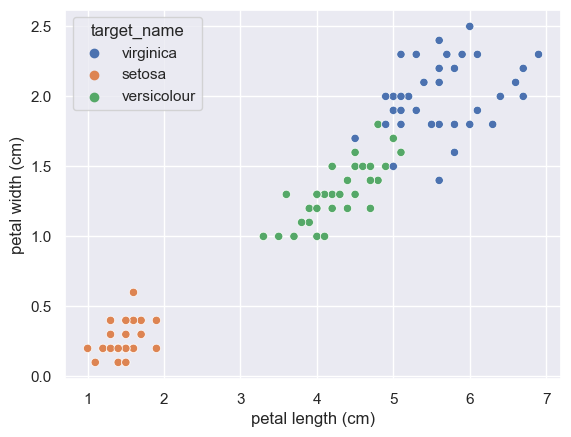

In [60]:
sns.scatterplot(x='petal length (cm)', y = 'petal width (cm)', hue='target_name', data=df_predictions)

### Model Tuning

What is model tuning?

Model tuning is trying to determine the parameters of your model(these are also known as "hyperparameters") that maximize the model performance.

In [61]:
for reg_param in (1,1.3,1.,2,4.7,4.8,5,5.3):
    print(reg_param)
    model = LogisticRegression(max_iter=200, C=reg_param)
    accuracies = cross_val_score(model, x_train, y_train, cv=3, scoring='accuracy')
    print(f"Accuracy: {np.mean(accuracies) * 100:.2f}%")

1
Accuracy: 94.64%
1.3
Accuracy: 94.64%
1.0
Accuracy: 94.64%
2
Accuracy: 94.64%
4.7
Accuracy: 95.54%
4.8
Accuracy: 95.54%
5
Accuracy: 95.54%
5.3
Accuracy: 95.54%


## Final Model

In [62]:
model = LogisticRegression(max_iter=200, C=4.8)

 ### How well does our model do on the Test Set?

In [63]:
X_test = df_test.drop(columns=['target' , 'target_name']).values
y_test = df_test['target'].values

In [64]:
X_test.shape

(38, 4)

In [65]:
y_test

array([2, 0, 2, 1, 1, 0, 1, 1, 2, 0, 2, 2, 2, 1, 0, 2, 0, 2, 0, 0, 2, 1,
       1, 1, 1, 1, 0, 2, 2, 1, 1, 2, 2, 0, 1, 0, 0, 0])

## Train our final model using our full Training Dataset

In [66]:
model.fit(x_train,y_train)

LogisticRegression(C=4.8, max_iter=200)

In [67]:
y_test_pred = model.predict(X_test)

In [68]:
test_set_correctly_classified = y_test_pred == y_test
test_set_accuracy = np.mean(test_set_correctly_classified)

In [69]:
print(f"Test set accuracy: {test_set_accuracy * 100:.2f}")

Test set accuracy: 97.37


In [70]:
df_predictions_test=df_test.copy()
df_predictions_test['correct_prediction']=test_set_correctly_classified
df_predictions_test['prediction'] = y_test_pred
df_predictions_test['prediction_label'] = df_predictions_test['prediction'].map({0: "setosa", 1: "versicolour", 2: "virginica"})

In [71]:
df_predictions_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,correct_prediction,prediction,prediction_label
136,6.3,3.4,5.6,2.4,2,virginica,True,2,virginica
15,5.7,4.4,1.5,0.4,0,setosa,True,0,setosa
127,6.1,3.0,4.9,1.8,2,virginica,True,2,virginica
72,6.3,2.5,4.9,1.5,1,versicolour,True,1,versicolour
59,5.2,2.7,3.9,1.4,1,versicolour,True,1,versicolour


In [72]:
def plot_incorrect_predictions(df_predictions, x_axis_feature,y_axis_feature):
    fig, axs = plt.subplots(2,2, figsize=(10,10))
    axs =axs. flatten()
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue='prediction_label', data=df_predictions, ax=axs[0])
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue='target_name', data=df_predictions, ax=axs[1])
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue='correct_prediction', data=df_predictions, ax=axs[2])
    plt.show()

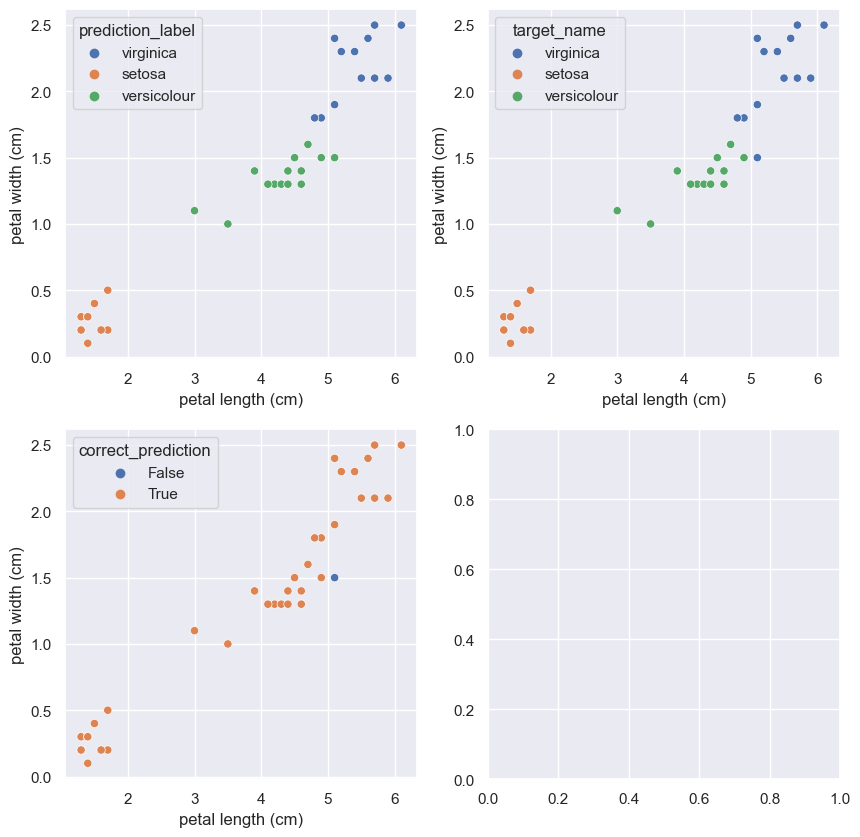

In [73]:
plot_incorrect_predictions(df_predictions_test, x_axis_feature="petal length (cm)", y_axis_feature='petal width (cm)')

## In Conclusion....

In conclusion, we achieved, we achieved a 97% accuracy on the test dataset using a Logistic Regression model.


In [75]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [76]:
import pickle
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# Load sample data
data = load_iris()
X, y = data.data, data.target

# Train a model
model = LogisticRegression(max_iter=200)
model.fit(X, y)

# Save the model to a pickle file
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [77]:
import pickle

# Load the model from the pickle file
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Verify that the model works
print(loaded_model.predict(X[:5]))


[0 0 0 0 0]
